In [1]:
import numpy as np
import altair as alt
import pandas as pd
from scipy.stats import norm
import scipy.stats as stats
from math import sqrt
from tqdm import tqdm

In [2]:
# Create a normal distribution with mu = 5 and std = 1
rv = norm(loc=5, scale=1)

In [3]:
l = []
for x in tqdm(range(100)):

    # Draw a sample of size 4000
    vals = rv.rvs(size=4000)
    
    df = pd.DataFrame()
    df['vals'] = vals

    median = df['vals'].median()
    mu = df['vals'].mean()
    std = df['vals'].std()
   
    # Calculate CI from sample
    r = stats.norm.interval(0.5, loc=mu, scale=std/sqrt(4000))
    
    # if sample mean in CI, return True
    if (5 > r[0]) and (5<r[1]):
        l.append([mu, r[0], r[1], True])
    else:
        l.append([mu, r[0], r[1], False])
    

100%|██████████| 100/100 [00:00<00:00, 96.91it/s]


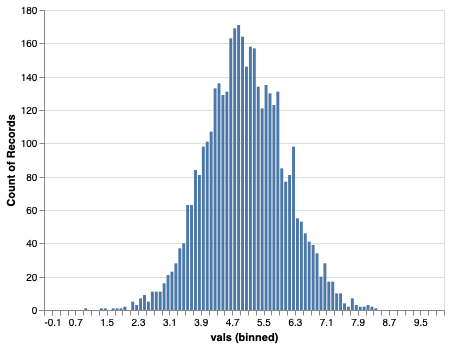

In [4]:
# Plot one sample
median = df['vals'].median()
mu = df['vals'].mean()
std = df['vals'].std()

alt.Chart(df).mark_bar().encode(
    alt.X("vals:Q", bin=alt.Bin(extent=[median - 5*std, median + 5*std], step=0.1)),
    alt.Y('count()'))

In [5]:
df = pd.DataFrame(l, columns = ['mu', 'c0', 'c1', 'in'])
df['point'] = df.index
df['rule'] = 5
df.head()

,mu,c0,c1,in,point,rule
0,5.011449,5.000469,5.022428,False,0,5
1,4.984360,4.973920,4.994799,False,1,5
2,4.995936,4.985341,5.006531,True,2,5
3,5.005581,4.995068,5.016094,True,3,5
4,5.011820,5.000942,5.022699,False,4,5


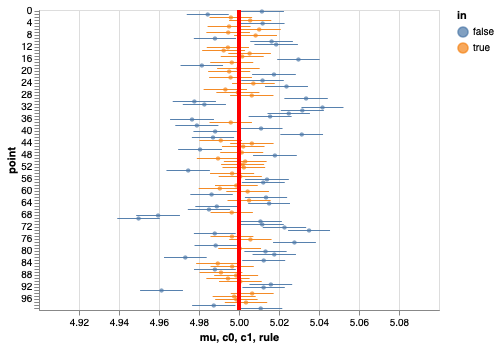

In [7]:
points = alt.Chart(df).mark_circle(size=20).encode(
    alt.X("mu:Q", scale=alt.Scale(domain=[4.9, 5.1])),
    alt.Y('point:O'),
    alt.Color('in'))

error_bars = points.mark_rule(size=0.5).encode(
    x='c0',
    x2='c1',
)

rule = alt.Chart(df).mark_rule(color='red', size=3).encode(
    x='rule'
)

(points + error_bars + rule).properties(height=300)

In [8]:
df['in'].value_counts()

False    53
True     47
Name: in, dtype: int64